#### OCR 저장

In [24]:
import deeplake
import numpy as np
from PIL import Image
import os
import xml.etree.ElementTree as ET

# === 실제 로컬 경로 설정 ===
xml_path = r'C:\UnderGraduate\Data Engineering\PR2\OCR_Dataset\annotations.xml'
image_dir = r'C:\UnderGraduate\Data Engineering\PR2\OCR_Dataset\images'

# === Deep Lake 데이터셋 생성 ===
ds = deeplake.empty('ocr_receipt_dataset', overwrite=True)
ds.create_tensor('images', htype='image', sample_compression='jpg')
ds.create_tensor('texts', htype='text')
ds.create_tensor('bboxes', htype='generic')
ds.create_tensor('label_type', htype='text')

# === 이미지 로드 함수 ===
def load_image(path):
    try:
        return np.array(Image.open(path).convert("RGB"))
    except Exception as e:
        print(f"❌ 이미지 열기 실패: {path} - {e}")
        return None

# === XML 파싱 및 데이터 추가 ===
tree = ET.parse(xml_path)
root = tree.getroot()
added_count = 0

for image in root.findall("image"):
    # 이미지 파일명 추출 (images/0.jpg or images\0.jpg -> 0.jpg)
    filename = image.attrib["name"].split("/")[-1].split("\\")[-1]
    image_path = os.path.join(image_dir, filename)

    if not os.path.exists(image_path):
        print("❌ 이미지 없음:", image_path)
        continue

    img_array = load_image(image_path)
    if img_array is None:
        continue

    for box in image.findall("box"):
        label = box.attrib.get("label", "unknown")
        xtl = float(box.attrib["xtl"])
        ytl = float(box.attrib["ytl"])
        xbr = float(box.attrib["xbr"])
        ybr = float(box.attrib["ybr"])

        text = ""
        for attr in box.findall("attribute"):
            if attr.attrib.get("name") == "text":
                text = attr.text or ""

        ds.append({
            'images': img_array,
            'texts': text,
            'bboxes': [xtl, ytl, xbr, ybr],
            'label_type': label
        })
        added_count += 1
        print(f"✅ 저장됨: {filename} | 텍스트: {text} | 라벨: {label} | 박스: {[xtl, ytl, xbr, ybr]}")

ds.commit("OCR 데이터셋 저장 완료")
print(f"\n🎉 총 저장된 샘플 수: {added_count}")

ocr_receipt_dataset loaded successfully.


✅ 저장됨: 0.jpg | 텍스트: WALMART | 라벨: shop | 박스: [153.76, 194.59, 481.86, 245.4]
✅ 저장됨: 0.jpg | 텍스트: TOTAL 5.11 | 라벨: total | 박스: [351.28, 604.95, 525.83, 624.91]
✅ 저장됨: 0.jpg | 텍스트: FRAP 001200010451 F 5.48 N | 라벨: item | 박스: [106.25, 517.3, 555.1, 541.35]
✅ 저장됨: 0.jpg | 텍스트: BANANAS 000000004011KF 0.41 lb @ 1 lb /0.49 0.20 N | 라벨: item | 박스: [104.28, 473.2, 556.78, 519.9]
✅ 저장됨: 0.jpg | 텍스트: 08/20/10 13:12:01 | 라벨: date_time | 박스: [214.25, 881.94, 437.99, 894.78]
✅ 저장됨: 1.jpg | 텍스트: TOTAL $38.68 | 라벨: total | 박스: [144.02, 774.05, 529.69, 790.61]


✅ 저장됨: 1.jpg | 텍스트: MINI-PEARL TOMATOES.. 2.49 | 라벨: item | 박스: [131.92, 427.14, 467.7, 445.28]
✅ 저장됨: 1.jpg | 텍스트: PKG SHREDDED MOZZARELLA LITE T 3.99 | 라벨: item | 박스: [133.05, 446.09, 468.0, 464.23]
✅ 저장됨: 1.jpg | 텍스트: EGGS 1 DOZ ORGANIC BROWN. 3.79 | 라벨: item | 박스: [135.57, 464.57, 468.7, 482.71]
✅ 저장됨: 1.jpg | 텍스트: BEANS GARBANZO 0.89 | 라벨: item | 박스: [134.82, 482.46, 469.3, 500.59]
✅ 저장됨: 1.jpg | 텍스트: GROCERY NON TAXABLE 0.98 2@ 0.49 | 라벨: item | 박스: [137.05, 573.04, 476.54, 610.19]
✅ 저장됨: 1.jpg | 텍스트: A-AVOCADOS HASS BAG 4CT 3.99 | 라벨: item | 박스: [134.7, 516.99, 471.62, 535.13]


✅ 저장됨: 1.jpg | 텍스트: SPROUTED CA STYLE 2.99 | 라벨: item | 박스: [135.4, 499.11, 469.96, 517.25]
✅ 저장됨: 1.jpg | 텍스트: BANANAS ORGANIC 0.87 3EA @ 0.29/EA | 라벨: item | 박스: [137.8, 612.19, 479.53, 648.84]
✅ 저장됨: 1.jpg | 텍스트: CREAMY SALTED PEANUT BUTTER 2.49 | 라벨: item | 박스: [138.48, 650.09, 483.0, 669.13]
✅ 저장됨: 1.jpg | 텍스트: WHL WHT PITA BREAD 1.69 | 라벨: item | 박스: [139.7, 670.27, 484.79, 688.4]
✅ 저장됨: 1.jpg | 텍스트: GROCERY NON TAXABLE 1.38 2 2@ 0.69 | 라벨: item | 박스: [140.97, 690.8, 487.34, 728.6]


✅ 저장됨: 1.jpg | 텍스트: R-CARROTS SHREDDED 10 OZ 1.29 | 라벨: item | 박스: [124.85, 331.06, 465.45, 349.2]
✅ 저장됨: 1.jpg | 텍스트: TRADER JOE'S | 라벨: shop | 박스: [190.45, 138.3, 495.73, 166.24]
✅ 저장됨: 1.jpg | 텍스트: A-APPLE BAG JAZZ 2 LB 2.99 | 라벨: item | 박스: [135.04, 535.29, 474.52, 553.42]
✅ 저장됨: 1.jpg | 텍스트: A-PEPPER BELL EACH XL RED 0.99 | 라벨: item | 박스: [135.41, 553.76, 474.89, 571.9]


✅ 저장됨: 1.jpg | 텍스트: R-CUCUMBERS PERSIAN 1 LB 1.99 | 라벨: item | 박스: [125.88, 350.66, 466.47, 368.8]
✅ 저장됨: 1.jpg | 텍스트: TOMATOES CRUSHED NO SALT 1.59 | 라벨: item | 박스: [127.66, 370.77, 466.6, 388.91]
✅ 저장됨: 1.jpg | 텍스트: TOMATOES WHOLE NO SALT W/BASIL 1.59 | 라벨: item | 박스: [129.01, 389.61, 467.95, 407.75]
✅ 저장됨: 1.jpg | 텍스트: 06-28-2014 12:34PM | 라벨: date_time | 박스: [150.25, 878.85, 327.94, 895.8]
✅ 저장됨: 1.jpg | 텍스트: ORGANIC OLD FASHIONED OATMEAL 2.69 | 라벨: item | 박스: [130.1, 409.01, 468.19, 427.15]


✅ 저장됨: 10.jpg | 텍스트: SMOKED VIENNAS 500GR 33.99 A | 라벨: item | 박스: [179.99, 486.63, 520.53, 505.55]
✅ 저장됨: 10.jpg | 텍스트: SPAR | 라벨: shop | 박스: [280.99, 276.71, 411.94, 301.07]
✅ 저장됨: 10.jpg | 텍스트: TOTAL FOR 14 ITEMS 338.16 | 라벨: total | 박스: [180.62, 753.43, 514.07, 769.7]
✅ 저장됨: 10.jpg | 텍스트: PEALED PEACHES 400G 82.99 A | 라벨: item | 박스: [180.44, 506.68, 520.98, 525.6]
✅ 저장됨: 10.jpg | 텍스트: MILKY BAR CHOC 80GR 16.99 A | 라벨: item | 박스: [179.0, 467.11, 519.54, 485.5]


✅ 저장됨: 10.jpg | 텍스트: LAZENBY WORCESTER SALICE 125ML 17.99 A | 라벨: item | 박스: [177.59, 446.18, 518.13, 465.1]
✅ 저장됨: 10.jpg | 텍스트: MEDITERRANEAN MIX 1KG 44.99 * | 라벨: item | 박스: [181.21, 526.63, 521.75, 545.56]
✅ 저장됨: 10.jpg | 텍스트: SPAR COOKING OIL 375ML 14.99 * | 라벨: item | 박스: [181.73, 547.78, 522.27, 564.6]
✅ 저장됨: 10.jpg | 텍스트: F/L ENGLISH CUCUMB 1'S 12.99 * | 라벨: item | 박스: [183.16, 568.21, 523.69, 584.6]
✅ 저장됨: 10.jpg | 텍스트: NESTLE AERO 85GR 20.99 A | 라벨: item | 박스: [183.74, 587.33, 524.28, 604.2]


✅ 저장됨: 10.jpg | 텍스트: CADBURY DAIRY MI 80 GR 16.99 A | 라벨: item | 박스: [182.56, 607.07, 524.57, 623.7]
✅ 저장됨: 10.jpg | 텍스트: 23.02.21 16:17 | 라벨: date_time | 박스: [398.99, 945.7, 528.23, 962.0]
✅ 저장됨: 10.jpg | 텍스트: CARRIER BAG 24L 1"S 0.75 A | 라벨: item | 박스: [181.62, 691.56, 528.68, 705.41]
✅ 저장됨: 10.jpg | 텍스트: BANANAS LOOSE 17KG 0.596kg @ 15.99 R /kg 9.53 * | 라벨: item | 박스: [182.57, 711.54, 530.02, 750.08]
✅ 저장됨: 10.jpg | 텍스트: GRAPES MIXED TUB TUB 24.99 * | 라벨: item | 박스: [182.94, 628.19, 525.05, 643.73]


✅ 저장됨: 10.jpg | 텍스트: TASTIC RICE 500GR 11.99 * | 라벨: item | 박스: [182.34, 649.85, 526.62, 665.06]
✅ 저장됨: 10.jpg | 텍스트: BLACK CAT SMOOTH 270GR 27.99 A | 라벨: item | 박스: [181.34, 669.78, 527.9, 684.8]
✅ 저장됨: 11.jpg | 텍스트: *WT PLUMS BLACK CV 2.15 B | 라벨: item | 박스: [102.4, 477.8, 498.46, 492.49]
✅ 저장됨: 11.jpg | 텍스트: * CAGE FREE ALL WHIT 3.69 B | 라벨: item | 박스: [133.9, 279.24, 481.23, 292.46]
✅ 저장됨: 11.jpg | 텍스트: WHOLE FOODS MARKET | 라벨: shop | 박스: [232.52, 101.87, 387.75, 177.0]


✅ 저장됨: 11.jpg | 텍스트: * PL TORTILLA'S 6.99 B | 라벨: item | 박스: [135.04, 260.21, 479.66, 273.43]
✅ 저장됨: 11.jpg | 텍스트: * BLACK BEANS 1.29 B | 라벨: item | 박스: [130.8, 299.72, 482.55, 312.94]
✅ 저장됨: 11.jpg | 텍스트: * Frozen Mangoes 16o 2.99 B | 라벨: item | 박스: [127.3, 319.86, 484.53, 333.08]
✅ 저장됨: 11.jpg | 텍스트: * Whole Strawberries 2.99 B | 라벨: item | 박스: [124.9, 341.0, 486.51, 354.22]
✅ 저장됨: 11.jpg | 텍스트: * OG LF COTTAGE CHEE 3.49 B | 라벨: item | 박스: [121.0, 362.46, 487.83, 375.68]


✅ 저장됨: 11.jpg | 텍스트: * MAHI MAHI FILLETS 8.99 B | 라벨: item | 박스: [117.8, 384.59, 489.81, 397.8]
✅ 저장됨: 11.jpg | 텍스트: * California Harvest 2.69 B | 라벨: item | 박스: [110.0, 430.65, 494.25, 443.87]
✅ 저장됨: 12.jpg | 텍스트: 10/20/07 13:48:43 | 라벨: date_time | 박스: [249.73, 894.56, 466.46, 913.3]
✅ 저장됨: 12.jpg | 텍스트: TOOTHBRUSH 003500055500 0.96 X | 라벨: item | 박스: [182.0, 447.51, 540.97, 464.5]


✅ 저장됨: 12.jpg | 텍스트: WOMEN SLIPPE 009725614790 9.86 X | 라벨: item | 박스: [179.2, 481.17, 541.8, 497.8]
✅ 저장됨: 12.jpg | 텍스트: TOTAL 18.75 | 라벨: total | 박스: [381.95, 549.48, 523.41, 564.98]
✅ 저장됨: 12.jpg | 텍스트: SW FIGURES 065356920144 6.63 X | 라벨: item | 박스: [182.5, 429.6, 541.1, 448.1]
✅ 저장됨: 12.jpg | 텍스트: WALMART | 라벨: shop | 박스: [220.01, 225.89, 541.01, 271.1]
✅ 저장됨: 13.jpg | 텍스트: Walmart | 라벨: shop | 박스: [216.19, 105.6, 426.4, 146.72]


✅ 저장됨: 13.jpg | 텍스트: GIFT CARD 087458604333 50.00 0 | 라벨: item | 박스: [197.46, 262.67, 504.31, 276.2]
✅ 저장됨: 13.jpg | 텍스트: 08/11/17 19:22:40 | 라벨: date_time | 박스: [260.5, 594.41, 423.04, 606.8]
✅ 저장됨: 13.jpg | 텍스트: TOTAL 50.00 | 라벨: total | 박스: [365.85, 294.67, 486.41, 308.73]


✅ 저장됨: 14.jpg | 텍스트: TOTAL 26.60 | 라벨: total | 박스: [1260.36, 1185.94, 1585.85, 1218.28]
✅ 저장됨: 14.jpg | 텍스트: VFUS ENG POM 005100024543 F 7.48 N | 라벨: item | 박스: [803.65, 923.22, 1616.62, 961.59]
✅ 저장됨: 14.jpg | 텍스트: 05/04/17 19:54:18 | 라벨: date_time | 박스: [1001.65, 1903.35, 1465.73, 1940.5]


✅ 저장됨: 14.jpg | 텍스트: LINT ROLLER2 005114123488 5.78 X | 라벨: item | 박스: [810.23, 1073.88, 1624.4, 1114.01]
✅ 저장됨: 14.jpg | 텍스트: DAWN ORIG 003700011045 5.97 X | 라벨: item | 박스: [805.47, 961.33, 1618.45, 1000.5]
✅ 저장됨: 14.jpg | 텍스트: EQUATE LINER 068113186503 3.88 X | 라벨: item | 박스: [802.14, 885.28, 1615.12, 925.4]


✅ 저장됨: 14.jpg | 텍스트: Walmart | 라벨: shop | 박스: [872.78, 503.8, 1380.72, 599.52]
✅ 저장됨: 14.jpg | 텍스트: 5OYD PKGTAPE 007535307841 1.12 X | 라벨: item | 박스: [808.2, 1036.75, 1622.4, 1076.87]
✅ 저장됨: 14.jpg | 텍스트: 5OYD PKGTAPE 007535307841 1.12 X | 라벨: item | 박스: [807.3, 999.05, 1620.28, 1037.8]
✅ 저장됨: 15.jpg | 텍스트: 07/22/16 20:53:11 | 라벨: date_time | 박스: [290.51, 748.07, 456.38, 761.8]


✅ 저장됨: 15.jpg | 텍스트: Walmart | 라벨: shop | 박스: [253.77, 196.59, 432.27, 237.27]
✅ 저장됨: 15.jpg | 텍스트: DIABETES 068113131172H 12.58 N | 라벨: item | 박스: [225.49, 334.68, 514.77, 353.6]
✅ 저장됨: 15.jpg | 텍스트: TOTAL 12.58 | 라벨: total | 박스: [383.82, 363.6, 499.61, 377.3]
✅ 저장됨: 16.jpg | 텍스트: 11/13/17 12:34:04 | 라벨: date_time | 박스: [214.9, 974.3, 436.42, 991.9]


✅ 저장됨: 16.jpg | 텍스트: ASST 27 063099656595 4.88 X | 라벨: item | 박스: [126.54, 499.36, 534.06, 517.36]
✅ 저장됨: 16.jpg | 텍스트: Walmart | 라벨: shop | 박스: [148.11, 273.55, 426.68, 327.9]
✅ 저장됨: 16.jpg | 텍스트: CUTIE CAR 063099656644 12.88 X | 라벨: item | 박스: [126.1, 520.5, 533.2, 538.8]
✅ 저장됨: 16.jpg | 텍스트: 6 WING PLATE 020108870398 3.98 P | 라벨: item | 박스: [126.93, 478.9, 534.0, 496.9]
✅ 저장됨: 16.jpg | 텍스트: TOTAL 23.19 | 라벨: total | 박스: [349.46, 604.83, 512.66, 621.45]


✅ 저장됨: 17.jpg | 텍스트: TOTAL 38.68 | 라벨: total | 박스: [469.91, 726.31, 606.64, 740.9]
✅ 저장됨: 17.jpg | 텍스트: CAMPARI TOM 073447501213 I 2.98 R | 라벨: item | 박스: [282.97, 499.86, 618.87, 514.4]
✅ 저장됨: 17.jpg | 텍스트: OSCRAN POM 003120027015 F 2.00 R | 라벨: item | 박스: [282.4, 468.2, 619.3, 483.2]
✅ 저장됨: 17.jpg | 텍스트: Walmart | 라벨: shop | 박스: [320.89, 264.0, 528.29, 302.43]
✅ 저장됨: 17.jpg | 텍스트: BANANAS 000000004011KI 1.75 lb @ 1 lb /0.54 0.95 R | 라벨: item | 박스: [282.65, 421.3, 618.27, 450.57]


✅ 저장됨: 17.jpg | 텍스트: BEVERAGE 003120002133 F 2.00 R | 라벨: item | 박스: [283.2, 453.0, 619.1, 466.2]
✅ 저장됨: 17.jpg | 텍스트: STRWBRY CC 076471782200 F 0.96 Y | 라벨: item | 박스: [282.25, 485.19, 618.15, 498.39]
✅ 저장됨: 17.jpg | 텍스트: 01/15/17 14:26:03 | 라벨: date_time | 박스: [347.4, 861.91, 544.59, 878.08]
✅ 저장됨: 17.jpg | 텍스트: INJECTR CLNR 004980710003 8.87 X | 라벨: item | 박스: [278.7, 643.03, 622.4, 658.3]
✅ 저장됨: 17.jpg | 텍스트: HAND CLEANER 004125100005 1.67 X | 라벨: item | 박스: [278.6, 626.79, 621.48, 642.0]


✅ 저장됨: 17.jpg | 텍스트: SH NYLON COL 007417024836 2.97 X | 라벨: item | 박스: [279.6, 610.81, 621.62, 625.8]
✅ 저장됨: 17.jpg | 텍스트: PILLS WHITE 068113113619 F 1.00Y | 라벨: item | 박스: [279.5, 594.58, 621.35, 609.3]
✅ 저장됨: 17.jpg | 텍스트: AVOCADO 000000004046KI 4 AT 1 FOR 0.44 1.76 R | 라벨: item | 박스: [281.51, 564.9, 621.0, 593.2]
✅ 저장됨: 17.jpg | 텍스트: HARD SALAMI 020533960343 F 3.43 Y | 라벨: item | 박스: [281.9, 548.02, 619.6, 563.1]
✅ 저장됨: 17.jpg | 텍스트: 44500982114 004450098211 F 3.98 Y | 라벨: item | 박스: [282.5, 532.51, 619.47, 547.9]


✅ 저장됨: 17.jpg | 텍스트: KFT SINGLES 002100061526 F 3.78 Y | 라벨: item | 박스: [282.3, 516.49, 619.83, 531.5]
✅ 저장됨: 18.jpg | 텍스트: GV VEG OIL 007874221000 F 7.82 N | 라벨: item | 박스: [203.49, 314.39, 504.79, 332.8]
✅ 저장됨: 18.jpg | 텍스트: GREAT VALUE 007874206203 F 2.84 N | 라벨: item | 박스: [205.88, 268.97, 503.91, 286.29]
✅ 저장됨: 18.jpg | 텍스트: GAIN LFE 003700077007 6.97 X | 라벨: item | 박스: [204.69, 284.48, 504.2, 302.44]
✅ 저장됨: 18.jpg | 텍스트: GAIN 003700076954 4.94 X | 라벨: item | 박스: [204.53, 298.99, 504.04, 316.95]


✅ 저장됨: 18.jpg | 텍스트: SNICKER FS 004000050533 F 3.78 X | 라벨: item | 박스: [202.87, 328.18, 504.65, 348.27]
✅ 저장됨: 18.jpg | 텍스트: SPREADS 002740026499 F 3.46 0 | 라벨: item | 박스: [199.22, 467.51, 503.1, 485.6]
✅ 저장됨: 18.jpg | 텍스트: CRNBRY SAUCE 003120001605 F 1.58 0 | 라벨: item | 박스: [199.2, 453.24, 503.33, 471.33]
✅ 저장됨: 18.jpg | 텍스트: GV 20Z MINI 007874219999 2.97 X | 라벨: item | 박스: [199.75, 435.08, 503.95, 455.1]
✅ 저장됨: 18.jpg | 텍스트: BATTERIES 001280051783 10.97 X | 라벨: item | 박스: [200.37, 420.18, 503.3, 439.9]


✅ 저장됨: 18.jpg | 텍스트: HY RSTLEG PM 035497333521H 9.97 N | 라벨: item | 박스: [201.12, 403.46, 504.05, 424.0]
✅ 저장됨: 18.jpg | 텍스트: GAIN 003700082365 1.97 X | 라벨: item | 박스: [201.93, 387.78, 505.01, 408.9]
✅ 저장됨: 18.jpg | 텍스트: CHERRIES 004326880002 F 1.78 X | 라벨: item | 박스: [201.42, 373.22, 505.17, 393.9]
✅ 저장됨: 18.jpg | 텍스트: MIXED CHOC 004000047587 F 13.24 X | 라벨: item | 박스: [201.98, 359.72, 504.92, 377.8]
✅ 저장됨: 18.jpg | 텍스트: GDBR FS 6PK 003400029305 F 4.76 X | 라벨: item | 박스: [202.29, 342.94, 504.32, 364.55]


✅ 저장됨: 18.jpg | 텍스트: GV WATER 007874235191 F 0.98 N | 라벨: item | 박스: [207.53, 225.54, 504.3, 240.42]
✅ 저장됨: 18.jpg | 텍스트: GV WATER 007874235191 F 0.98 N | 라벨: item | 박스: [206.93, 240.43, 504.02, 255.69]
✅ 저장됨: 18.jpg | 텍스트: GREAT VALUE 007874206203 F 2.84 N | 라벨: item | 박스: [206.2, 254.17, 504.23, 269.05]
✅ 저장됨: 18.jpg | 텍스트: Walmart | 라벨: shop | 박스: [295.0, 135.88, 401.99, 156.35]
✅ 저장됨: 18.jpg | 텍스트: EGGS 6CT 007874212709 F 0.9 0 | 라벨: item | 박스: [198.04, 484.21, 502.8, 502.29]
✅ 저장됨: 18.jpg | 텍스트: 10/31/21 10:08:22 | 라벨: date_time | 박스: [271.79, 736.47, 435.54, 750.3]


✅ 저장됨: 18.jpg | 텍스트: TOTAL 86.35 | 라벨: total | 박스: [368.4, 535.8, 487.59, 549.82]
✅ 저장됨: 19.jpg | 텍스트: RED GRAPE 000000004023 KF 2.51 lb @ 1 lb /1.44 3.61 N | 라벨: item | 박스: [204.37, 467.1, 538.3, 508.01]
✅ 저장됨: 19.jpg | 텍스트: FIBER CHOICE 036926600094 12.94 N | 라벨: item | 박스: [205.88, 432.2, 538.4, 456.32]
✅ 저장됨: 19.jpg | 텍스트: GRILL COVER 471288396027 14.97 X | 라벨: item | 박스: [207.48, 414.8, 538.09, 438.92]
✅ 저장됨: 19.jpg | 텍스트: Walmart | 라벨: shop | 박스: [304.78, 317.8, 421.3, 342.5]


✅ 저장됨: 19.jpg | 텍스트: TOTAL 35.05 | 라벨: total | 박스: [386.54, 543.62, 521.09, 560.7]
✅ 저장됨: 19.jpg | 텍스트: CELERY HEART 003338365301 2.48 N | 라벨: item | 박스: [205.29, 449.6, 537.66, 473.09]
✅ 저장됨: 19.jpg | 텍스트: 10/16/21 11:22:45 | 라벨: date_time | 박스: [263.01, 807.0, 467.98, 828.67]
✅ 저장됨: 2.jpg | 텍스트: 10/18/20 11:30:46 | 라벨: date_time | 박스: [143.22, 691.14, 299.94, 706.8]
✅ 저장됨: 2.jpg | 텍스트: TOTAL 49.90 | 라벨: total | 박스: [241.42, 261.93, 355.37, 273.98]


✅ 저장됨: 2.jpg | 텍스트: M ATHLETICS 019104567781 24.97 X | 라벨: item | 박스: [79.0, 199.6, 371.5, 213.54]
✅ 저장됨: 2.jpg | 텍스트: Waalmart | 라벨: shop | 박스: [160.16, 82.48, 264.62, 102.22]
✅ 저장됨: 2.jpg | 텍스트: GV OATMEAL 007874243408 F 1.76 0 | 라벨: item | 박스: [78.97, 170.4, 371.08, 184.1]
✅ 저장됨: 2.jpg | 텍스트: DEXAS 15X20 008429710921 12.97 X | 라벨: item | 박스: [78.65, 214.65, 370.76, 229.6]
✅ 저장됨: 2.jpg | 텍스트: OT 200Z TUM 081236803115 6.74 X | 라벨: item | 박스: [79.5, 184.68, 371.61, 198.38]


✅ 저장됨: 3.jpg | 텍스트: TATER TOTS 001312000026 F 2.96 O | 라벨: item | 박스: [182.03, 192.37, 478.69, 210.9]
✅ 저장됨: 3.jpg | 텍스트: HARD/PROV/DC 007874219410 F 2.68 0 | 라벨: item | 박스: [178.51, 363.45, 472.95, 378.1]
✅ 저장됨: 3.jpg | 텍스트: STOK LT SWT 004127102774 F 4.42 T | 라벨: item | 박스: [177.76, 405.98, 471.42, 420.33]
✅ 저장됨: 3.jpg | 텍스트: AVO VERDE 061611206143 F 2.98 N | 라벨: item | 박스: [176.71, 434.06, 470.37, 448.42]
✅ 저장됨: 3.jpg | 텍스트: APPLE 3 BAG 084747300184 F 6.47 N | 라벨: item | 박스: [177.49, 392.25, 471.15, 406.6]


✅ 저장됨: 3.jpg | 텍스트: DV RSE OIL M 001111101220 6.94 X | 라벨: item | 박스: [177.93, 378.18, 472.3, 391.97]
✅ 저장됨: 3.jpg | 텍스트: ACCESSORY 007515161216 0.97 X | 라벨: item | 박스: [171.9, 529.75, 469.21, 545.14]
✅ 저장됨: 3.jpg | 텍스트: CHEEZE IT 002410053523 F 4.00 0 WAS 4.54 YOU SAVED 0.64 | 라벨: item | 박스: [170.62, 545.26, 469.24, 573.2]
✅ 저장됨: 3.jpg | 텍스트: RITZ 004400088210 F 2.78 N | 라벨: item | 박스: [168.57, 572.29, 469.62, 588.71]


✅ 저장됨: 3.jpg | 텍스트: GV HNY GRMS 007874207253 F 1.28 N | 라벨: item | 박스: [167.44, 602.1, 469.32, 617.86]
✅ 저장됨: 3.jpg | 텍스트: Walmart | 라벨: shop | 박스: [275.43, 109.8, 379.54, 134.15]
✅ 저장됨: 3.jpg | 텍스트: 04/27/19 12:59:46 | 라벨: date_time | 박스: [223.71, 765.47, 395.47, 779.99]
✅ 저장됨: 3.jpg | 텍스트: PEANUT BUTTR 005150025499 F 5.44 0 | 라벨: item | 박스: [177.2, 419.38, 470.86, 433.73]
✅ 저장됨: 3.jpg | 텍스트: HARD/PROV/DC 007874219410 F 2.68 O | 라벨: item | 박스: [183.4, 205.76, 478.0, 224.3]


✅ 저장됨: 3.jpg | 텍스트: SNACK BARS 002190848816 F 4.98 T | 라벨: item | 박스: [182.26, 219.93, 478.92, 238.46]
✅ 저장됨: 3.jpg | 텍스트: HRI CL PEP 003120507000 F 5.88 0 | 라벨: item | 박스: [179.61, 305.68, 474.87, 323.6]
✅ 저장됨: 3.jpg | 텍스트: HRI 12 U SG 003120535000 F 5.88 0 | 라벨: item | 박스: [180.45, 291.61, 475.12, 308.9]
✅ 저장됨: 3.jpg | 텍스트: HRI CL CHS 003120506000 F 5.88-0 | 라벨: item | 박스: [180.7, 277.46, 475.37, 295.99]
✅ 저장됨: 3.jpg | 텍스트: HRI CL CHS 003120506000 F 5.88 0 | 라벨: item | 박스: [181.6, 248.86, 477.19, 267.4]


✅ 저장됨: 3.jpg | 텍스트: HRI CL CHS 003120506000 F 5.88 0 | 라벨: item | 박스: [182.3, 234.06, 477.7, 252.59]
✅ 저장됨: 3.jpg | 텍스트: GV SLIDERS 007874201525 2.98 X | 라벨: item | 박스: [173.07, 515.88, 469.2, 530.23]
✅ 저장됨: 3.jpg | 텍스트: BAGELS 001376402801 F 4.56 0 | 라벨: item | 박스: [174.86, 502.76, 469.2, 517.12]
✅ 저장됨: 3.jpg | 텍스트: GALE 000000000003K 32.00 T | 라벨: item | 박스: [175.9, 474.89, 469.56, 489.24]
✅ 저장됨: 3.jpg | 텍스트: BTS DRY BLON 501072452746 6.58 X | 라벨: item | 박스: [175.91, 461.24, 469.57, 475.59]


✅ 저장됨: 3.jpg | 텍스트: ROLLS 007874219415 F 1.28 0 | 라벨: item | 박스: [176.33, 447.33, 469.99, 461.69]
✅ 저장됨: 3.jpg | 텍스트: EARBUDS 068113100946 4.88 X | 라벨: item | 박스: [179.6, 320.91, 474.63, 337.0]
✅ 저장됨: 3.jpg | 텍스트: RUFFLES 002840020942 F 250 N | 라벨: item | 박스: [168.21, 587.3, 469.72, 603.44]
✅ 저장됨: 3.jpg | 텍스트: SC BCN CHDDR 007874202906 F 6.98 0 | 라벨: item | 박스: [179.3, 335.18, 473.67, 350.7]
✅ 저장됨: 3.jpg | 텍스트: ABF THINBRST 022451710972 F 9.72 0 | 라벨: item | 박스: [178.93, 348.46, 473.22, 364.3]


✅ 저장됨: 3.jpg | 텍스트: TOTAL 144.02 | 라벨: total | 박스: [335.11, 647.44, 453.65, 661.4]
✅ 저장됨: 3.jpg | 텍스트: TR HS FRM 4 002240062190 2.74 X | 라벨: item | 박스: [175.48, 488.64, 469.14, 503.0]
✅ 저장됨: 4.jpg | 텍스트: SW HRO FGHTR 063050940732 6.94 T | 라벨: item | 박스: [89.61, 149.48, 351.51, 163.51]
✅ 저장됨: 4.jpg | 텍스트: Walmart | 라벨: shop | 박스: [120.24, 21.5, 285.39, 53.1]
✅ 저장됨: 4.jpg | 텍스트: 12/08/15 12:39:26 | 라벨: date_time | 박스: [136.46, 477.31, 284.4, 490.99]


✅ 저장됨: 4.jpg | 텍스트: TOTAL 7.43 | 라벨: total | 박스: [233.88, 190.41, 336.43, 202.2]


✅ 저장됨: 5.jpg | 텍스트: KITL SEA SALT POT CHP $1.29 F | 라벨: item | 박스: [293.27, 844.55, 1846.97, 925.55]
✅ 저장됨: 5.jpg | 텍스트: 02/10/2021 07:10 PM | 라벨: date_time | 박스: [961.3, 3235.17, 1733.34, 3306.78]
✅ 저장됨: 5.jpg | 텍스트: Total : $28.28 | 라벨: total | 박스: [846.9, 1317.19, 1796.92, 1387.5]


✅ 저장됨: 5.jpg | 텍스트: WHOLE FOODS MARKET | 라벨: shop | 박스: [423.54, 180.43, 1898.5, 472.2]
✅ 저장됨: 5.jpg | 텍스트: CHEF PLATE MEAL $10 2 @ $10.00 ea $20.00 F | 라벨: item | 박스: [288.83, 1006.53, 1864.34, 1163.27]
✅ 저장됨: 5.jpg | 텍스트: BRAIDED BRIOCHE $6.99 F | 라벨: item | 박스: [288.91, 920.32, 1853.94, 1005.67]


✅ 저장됨: 6.JPG | 텍스트: 26/01/2015 16:14 | 라벨: date_time | 박스: [367.72, 1249.69, 774.7, 1300.01]
✅ 저장됨: 6.JPG | 텍스트: 1 Woman 0 | 라벨: item | 박스: [178.83, 652.52, 1025.18, 694.81]
✅ 저장됨: 6.JPG | 텍스트: 1 Mineral Water 13, 000 | 라벨: item | 박스: [173.0, 781.0, 1034.17, 821.0]
✅ 저장됨: 6.JPG | 텍스트: 2 Ham Cheese 74, 000 | 라벨: item | 박스: [176.11, 695.89, 1026.63, 737.36]


✅ 저장됨: 6.JPG | 텍스트: 1 Black & White 72, 000 | 라벨: item | 박스: [169.26, 825.13, 1038.72, 865.17]
✅ 저장됨: 6.JPG | 텍스트: MOMI TOY'S CREPERIE | 라벨: shop | 박스: [301.44, 91.12, 885.93, 188.8]
✅ 저장됨: 6.JPG | 텍스트: TOTAL 175, 000 | 라벨: total | 박스: [200.23, 1004.1, 1058.44, 1047.22]
✅ 저장됨: 6.JPG | 텍스트: 1 Ice Java Tea 16, 000 | 라벨: item | 박스: [176.26, 738.32, 1030.04, 780.46]


✅ 저장됨: 7.jpg | 텍스트: 6 WING PLATE 020108870398 3.98 P | 라벨: item | 박스: [127.92, 478.43, 534.02, 497.42]
✅ 저장됨: 7.jpg | 텍스트: 11/13/17 12:34:11 | 라벨: date_time | 박스: [196.65, 1221.04, 434.52, 1240.5]
✅ 저장됨: 7.jpg | 텍스트: ASST 27 063099656595 4.88 X | 라벨: item | 박스: [126.78, 498.73, 534.57, 518.2]
✅ 저장됨: 7.jpg | 텍스트: CUTIE CAR 063099656644 12.88 X | 라벨: item | 박스: [126.56, 519.98, 533.99, 539.21]


✅ 저장됨: 7.jpg | 텍스트: Walmart | 라벨: shop | 박스: [149.13, 273.42, 427.23, 327.97]
✅ 저장됨: 7.jpg | 텍스트: TOTAL 23.19 | 라벨: total | 박스: [350.09, 604.74, 513.59, 622.12]
✅ 저장됨: 8.jpg | 텍스트: E 6333561 KS DICED TOM 6.49 E | 라벨: item | 박스: [46.8, 279.95, 378.2, 297.31]
✅ 저장됨: 8.jpg | 텍스트: 404609 ECO HALF PAN 6.49 A | 라벨: item | 박스: [101.87, 383.16, 383.1, 400.53]
✅ 저장됨: 8.jpg | 텍스트: Costco WHOLESALE | 라벨: shop | 박스: [100.85, 71.3, 326.01, 133.35]


✅ 저장됨: 8.jpg | 텍스트: 04/20/2016 15:00 | 라벨: date_time | 박스: [50.36, 687.72, 201.59, 704.71]
✅ 저장됨: 8.jpg | 텍스트: E 22101 MONT JACK 2# 4.45 E | 라벨: item | 박스: [51.5, 448.15, 386.04, 465.52]
✅ 저장됨: 8.jpg | 텍스트: E 263423 CHPD ONION 3.59 E | 라벨: item | 박스: [50.42, 426.5, 385.06, 443.87]
✅ 저장됨: 8.jpg | 텍스트: E 55992 GRND TURKEY 18.47 E | 라벨: item | 박스: [50.2, 405.47, 383.6, 422.83]


✅ 저장됨: 8.jpg | 텍스트: E 77053 GRAPE TOMATO 6.29 E | 라벨: item | 박스: [49.0, 363.52, 382.1, 380.89]
✅ 저장됨: 8.jpg | 텍스트: 3 @ 4.29 E 878137 18 CT EGGS 12.87 E | 라벨: item | 박스: [47.72, 323.55, 380.27, 359.6]
✅ 저장됨: 8.jpg | 텍스트: E 967596 JACKORGSALSA 2.97 E | 라벨: item | 박스: [47.96, 300.86, 378.6, 318.23]
✅ 저장됨: 8.jpg | 텍스트: E 673919 FF BS BREAST 23.99 E | 라벨: item | 박스: [46.5, 259.51, 377.13, 276.88]
✅ 저장됨: 8.jpg | 텍스트: **** TOTAL 89.13 | 라벨: total | 박스: [78.12, 510.43, 371.43, 527.15]


✅ 저장됨: 9.jpg | 텍스트: WinCo FOODS | 라벨: shop | 박스: [186.01, 118.44, 375.1, 174.41]
✅ 저장됨: 9.jpg | 텍스트: SUNBEAN BUNS 7763306333 1.98 FS | 라벨: item | 박스: [81.7, 811.41, 444.0, 825.23]
✅ 저장됨: 9.jpg | 텍스트: EYE RND STK FP 20148200000 8.24 FS | 라벨: item | 박스: [129.45, 438.8, 418.61, 464.95]
✅ 저장됨: 9.jpg | 텍스트: 09/08/14 11:16:24 | 라벨: date_time | 박스: [136.25, 268.9, 405.49, 290.98]
✅ 저장됨: 9.jpg | 텍스트: BEEF FOR STEW 20254300000 10.48 FS | 라벨: item | 박스: [126.61, 451.29, 418.81, 478.04]


✅ 저장됨: 9.jpg | 텍스트: PORK 1/2 LOIN 20323300000 8.12 FS | 라벨: item | 박스: [124.82, 467.09, 419.7, 491.08]
✅ 저장됨: 9.jpg | 텍스트: B/BEST S STEAK 4497921020 1.00 FS | 라벨: item | 박스: [123.83, 482.0, 421.39, 504.55]
✅ 저장됨: 9.jpg | 텍스트: N/YORK TX GRLC 7045900558 2.18 FS | 라벨: item | 박스: [139.98, 294.8, 413.61, 326.52]
✅ 저장됨: 9.jpg | 텍스트: PORK LOIN CHOP 20337400000 9.91 FS | 라벨: item | 박스: [133.9, 395.7, 416.85, 424.93]
✅ 저장됨: 9.jpg | 텍스트: CHICKEN WINGS 26840100000 5.39 FS | 라벨: item | 박스: [139.59, 306.4, 413.22, 338.13]


✅ 저장됨: 9.jpg | 텍스트: PICSWEET BLEND 7056096902 2.68 FS 2 @ 1.34 | 라벨: item | 박스: [138.88, 318.6, 412.9, 358.33]
✅ 저장됨: 9.jpg | 텍스트: PICSWEET GREENS 7056087677 2.56 FS 2 @ 1.28 | 라벨: item | 박스: [137.46, 343.34, 414.7, 384.13]
✅ 저장됨: 9.jpg | 텍스트: WINCO HOMO MILK 7055240600 2.48 FS | 라벨: item | 박스: [82.89, 843.93, 443.94, 858.46]
✅ 저장됨: 9.jpg | 텍스트: EGGS 7003837280 1.37 FS | 라벨: item | 박스: [84.12, 860.64, 443.08, 876.5]
✅ 저장됨: 9.jpg | 텍스트: HUNTS MANWICH 2700044212 1.64 FS 2@ .82 | 라벨: item | 박스: [91.3, 740.82, 443.72, 774.68]


✅ 저장됨: 9.jpg | 텍스트: DM SPAG SAUCE 2400052363 .71 FS | 라벨: item | 박스: [94.36, 723.05, 443.18, 740.12]
✅ 저장됨: 9.jpg | 텍스트: RESERS POT SLD 7111719300 .98 FS | 라벨: item | 박스: [96.6, 706.83, 442.31, 721.7]
✅ 저장됨: 9.jpg | 텍스트: TURKEY FRANK 4222281210 .88 FS | 라벨: item | 박스: [100.1, 689.0, 441.4, 703.87]
✅ 저장됨: 9.jpg | 텍스트: CHIKEN WINGS 26840100000 5.48 FS | 라벨: item | 박스: [135.7, 369.19, 416.14, 399.24]
✅ 저장됨: 9.jpg | 텍스트: KEEB TOWNHOUSE 3010010055 1.98 FS | 라벨: item | 박스: [102.7, 671.65, 440.42, 687.44]
✅ 저장됨: 9.jpg | 텍스트: L\D OATMEL CRM 2430004101 1.25 FS | 라벨: item | 박스: [105.94, 637.2, 438.7, 653.14]


✅ 저장됨: 9.jpg | 텍스트: L/D NUTTY BARS 2430004120 1.25 FS | 라벨: item | 박스: [108.24, 621.16, 437.46, 636.04]
✅ 저장됨: 9.jpg | 텍스트: EGGO WAFFLE 3800037435 1.96 FS | 라벨: item | 박스: [110.2, 604.88, 436.25, 620.39]
✅ 저장됨: 9.jpg | 텍스트: THNDRBRD CHIX BR 3737101318 5.98 FS | 라벨: item | 박스: [115.76, 558.32, 429.17, 577.7]
✅ 저장됨: 9.jpg | 텍스트: DIET LN GRND B 20167400000 10.87 FS | 라벨: item | 박스: [134.6, 381.78, 416.11, 411.82]
✅ 저장됨: 9.jpg | 텍스트: TOTAL 121.92 | 라벨: total | 박스: [186.84, 930.67, 415.0, 948.1]


✅ 저장됨: 9.jpg | 텍스트: WINCO NOODLES 7055280303 1.68 FS 2 @ .84 | 라벨: item | 박스: [120.1, 527.22, 425.79, 558.39]
✅ 저장됨: 9.jpg | 텍스트: O/M HAM 4470001903 3.99 FS | 라벨: item | 박스: [120.91, 513.3, 423.44, 536.47]
✅ 저장됨: 9.jpg | 텍스트: KRFT DELUXE MAC 2100065886 3.64 FS 2 @ 1.82 | 라벨: item | 박스: [114.17, 572.79, 431.59, 605.1]
✅ 저장됨: 9.jpg | 텍스트: LINKS MILD 74295503660 5.78 FS | 라벨: item | 박스: [104.26, 654.6, 439.2, 669.93]
✅ 저장됨: 9.jpg | 텍스트: DRUMSTICKS 26841800000 9.91 FS | 라벨: item | 박스: [132.51, 408.6, 417.34, 438.65]
✅ 저장됨: 9.jpg | 텍스트: BAR S MEAT FRNK 1590013401 .88 FS | 라벨: item | 박스: [122.23, 495.6, 422.39, 518.13]
✅ 저장됨: 9.jpg | 텍스트: WINCO SNDWCH WT 7055200115 .91 FS | 라벨: item | 박스: [82.79, 827.67, 443.85, 842.2]
✅ 저장됨: 9.jpg | 텍스트: DM PNAPL CHNKY 2400000164 1.96 FS 2 @ .98 | 라벨: item | 박스: [84.4, 776.94, 445.25, 810.8]

🎉 총 저장된 샘플 수: 234


In [25]:
print(ds.tensors)  # 텐서 이름 목록 출력

# 각 텐서의 구조(타입, shape, 길이 등)
for name, tensor in ds.tensors.items():
    print(f"TENSOR: {name}")
    print(" - dtype:", tensor.dtype)
    print(" - shape:", tensor.shape)
    print(" - sample:", tensor[0].numpy() if len(tensor) > 0 else "empty")
    print("-----------")

{'bboxes': Tensor(key='bboxes'), 'images': Tensor(key='images'), 'label_type': Tensor(key='label_type'), 'texts': Tensor(key='texts')}
TENSOR: bboxes
 - dtype: float64
 - shape: (234, 4)
 - sample: [153.76 194.59 481.86 245.4 ]
-----------
TENSOR: images
 - dtype: uint8
 - shape: (234, None, None, 3)
 - sample: [[[87 79 68]
  [88 80 69]
  [93 85 74]
  ...
  [80 70 58]
  [79 69 57]
  [78 68 56]]

 [[91 83 72]
  [91 83 72]
  [94 86 75]
  ...
  [82 72 60]
  [81 71 59]
  [80 70 58]]

 [[95 87 76]
  [93 85 74]
  [93 85 74]
  ...
  [84 74 62]
  [84 74 62]
  [83 73 61]]

 ...

 [[76 50 37]
  [77 51 38]
  [87 61 48]
  ...
  [90 83 67]
  [89 82 66]
  [88 81 65]]

 [[82 56 43]
  [72 46 33]
  [76 50 37]
  ...
  [90 83 67]
  [90 83 67]
  [89 82 66]]

 [[79 56 42]
  [65 42 28]
  [70 47 33]
  ...
  [90 83 67]
  [90 83 67]
  [90 83 67]]]
-----------
TENSOR: label_type
 - dtype: <U0
 - shape: (234, 1)
 - sample: ['shop']
-----------
TENSOR: texts
 - dtype: <U0
 - shape: (234, 1)
 - sample: ['WALMART']

In [27]:
sample = ds[0]
print("이미지 shape:", sample['images'].shape)
print("OCR 텍스트:", sample['texts'].numpy())
print("바운딩 박스:", sample['bboxes'].numpy())
print("라벨 유형:", sample['label_type'].numpy())

이미지 shape: (1023, 612, 3)
OCR 텍스트: ['WALMART']
바운딩 박스: [153.76 194.59 481.86 245.4 ]
라벨 유형: ['shop']


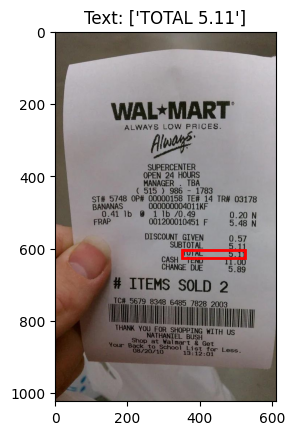

In [49]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

img = ds.images[0].numpy()
bbox = ds.bboxes[1].numpy()
text = ds.texts[1].numpy()

fig, ax = plt.subplots(1)
ax.imshow(img)

# bbox 시각화
x, y, x2, y2 = bbox
w, h = x2 - x, y2 - y
rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.title(f"Text: {text}")
plt.show()

In [ ]:
# 필터링 (label_type == "total"만 추출)
filtered_ds = ds.filter(lambda x: x['label_type'].numpy() == 'total')
print("총 'total' 항목 수:", len(filtered_ds))

100%|██████████| 234/234 [00:00<00:00, 1037.05it/s]

총 'total' 항목 수: 19


## Activeloop 연동

In [ ]:
import deeplake

ds = deeplake.empty("hub://user_name/ocr-receipt", token="")

Your Deep Lake dataset has been successfully created!


This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/chocolee/ocr-receipt
hub://chocolee/ocr-receipt loaded successfully.


In [ ]:
ds_local = deeplake.dataset(r"C:\UnderGraduate\Data Engineering\PR2\ocr_receipt_dataset")

# 필요한 텐서 구조 미리 만들기
ds.create_tensor('images', htype='image', sample_compression='jpg')
ds.create_tensor('texts', htype='text')
ds.create_tensor('bboxes', htype='generic')
ds.create_tensor('label_type', htype='text')

# 로컬 데이터 복사 후 append
for i in range(len(ds_local)):
    ds.append({
        'images': ds_local.images[i].numpy(),
        'texts': ds_local.texts[i].numpy(),
        'bboxes': ds_local.bboxes[i].numpy(),
        'label_type': ds_local.label_type[i].numpy()
    })

# 커밋 (선택)
ds.commit("v1: 로컬 → Hub 업로드 완료")

In [63]:
from tqdm import tqdm

# 로컬 데이터 로드
ds_local = deeplake.dataset(r"C:\UnderGraduate\Data Engineering\PR2\ocr_receipt_dataset")

for i in tqdm(range(len(ds_local))):
    ds.append({
        'images': ds_local.images[i].numpy(),
        'texts': ds_local.texts[i].numpy(),
        'bboxes': ds_local.bboxes[i].numpy(),
        'label_type': ds_local.label_type[i].numpy()
    })

ds.commit("v1: tqdm으로 append 완료")

C:\UnderGraduate\Data Engineering\PR2\ocr_receipt_dataset loaded successfully.



  0%|          | 0/234 [00:00<?, ?it/s]

100%|██████████| 234/234 [1:54:57<00:00, 29.48s/it]


'firstdbf9474d461a19e9333c2fd19b46115348f'

## Pytorch

In [1]:
# HuggingFace TrOCR 모델과 Deep Lake OCR 데이터셋을 연동해 OCR 학습 가능 구조로 구성
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import deeplake
from torch.utils.data import random_split, DataLoader
import torch
from PIL import Image
import numpy as np

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\deeplake\util\check_latest_version.py:32: UserWarning: A newer version of deeplake (4.2.1) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(


In [ ]:
# 1. Deep Lake OCR 데이터셋 로드
ds = deeplake.empty("hub://user_name/ocr-receipt", token="")

# 2. 학습/검증 분리
train_ds, test_ds = random_split(ds, [int(0.8 * len(ds)), len(ds) - int(0.8 * len(ds))])

-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/chocolee/ocr-receipt



|

hub://chocolee/ocr-receipt loaded successfully.



 Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.49.0"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> 

In [16]:
# 3. HuggingFace TrOCR 모델 및 프로세서 로드
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-stage1")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-stage1")

# 필수 설정 2가지
model.config.decoder_start_token_id = processor.tokenizer.cls_token_id
model.config.pad_token_id = processor.tokenizer.pad_token_id

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.49.0"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decode

In [10]:
# 4. Custom Collate Function
def collate_fn(batch):
    images, texts = [], []
    for sample in batch:
        image = sample['images']

        if hasattr(image, "numpy"):
            image = image.numpy()
        if isinstance(image, list):
            image = np.array(image)
        if not isinstance(image, Image.Image):
            image = Image.fromarray(image.astype(np.uint8))
        images.append(image)

        text = sample['texts']
        if hasattr(text, "numpy"):
            text = text.numpy().decode() if isinstance(text.numpy(), bytes) else str(text.numpy())
        texts.append(str(text))

    pixel_values = processor(images=images, return_tensors="pt").pixel_values
    labels = processor.tokenizer(
        texts,
        padding="max_length",
        truncation=True,
        return_tensors="pt"
    ).input_ids
    labels[labels == processor.tokenizer.pad_token_id] = -100
    return {"pixel_values": pixel_values, "labels": labels}


# 5. PyTorch DataLoader 구성
train_loader = DataLoader(train_ds, batch_size=2, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_ds, batch_size=2, shuffle=False, collate_fn=collate_fn)

In [17]:
# 6. 간단한 학습 루프 예시 (1배치만)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.train()

for batch in train_loader:
    inputs = {k: v.to(device) for k, v in batch.items()}
    outputs = model(**inputs)
    loss = outputs.loss
    result = f"✅ 1 배치 학습 완료 | Loss: {loss.item():.4f}"
    break

result

'✅ 1 배치 학습 완료 | Loss: 8.9773'

In [19]:
# 7. 배치 불러오기 (학습은 하지 않고 비교만)
batch = next(iter(train_loader))
inputs = {k: v.to(device) for k, v in batch.items()}

# 8. 예측 결과 생성
model.eval()
generated_ids = model.generate(inputs["pixel_values"])
decoded_preds = processor.batch_decode(generated_ids, skip_special_tokens=True)

# 9. 정답 라벨 복원 후 디코딩
labels = inputs["labels"].clone()
labels[labels == -100] = processor.tokenizer.pad_token_id
decoded_labels = processor.batch_decode(labels, skip_special_tokens=True)

# 10. 출력
for pred, label in zip(decoded_preds, decoded_labels):
    print(f"🔍 예측: {pred}")
    print(f"✅ 정답: {label}")
    print("-" * 30)

🔍 예측: E
✅ 정답: ['GROCERY NON TAXABLE 0.98 2@ 0.49']
------------------------------
🔍 예측: D
✅ 정답: ['BANANAS LOOSE 17KG 0.596kg @ 15.99 R /kg 9.53 *']
------------------------------


In [ ]:
ds_pred = deeplake.empty("hub://user_name/ocr-receipt-predicted", token="")

# 원본 텐서 구조 복사
ds_pred.create_tensor('images', htype='image', sample_compression='jpg')
ds_pred.create_tensor('texts', htype='text') # 정답 텍스트
ds_pred.create_tensor('bboxes', htype='generic')   
ds_pred.create_tensor('label_type', htype='text')   
ds_pred.create_tensor('predicted_text', htype='text') # 모델이 예측한 결과

Your Deep Lake dataset has been successfully created!


This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/chocolee/ocr-receipt-predicted
hub://chocolee/ocr-receipt-predicted loaded successfully.


Tensor(key='predicted_text')

In [ ]:
ds_pred = deeplake.empty("hub://유저네임/예측결과저장db명", token="API키")

# 원본 텐서 구조 복사
ds_pred.create_tensor('images', htype='image', sample_compression='jpg')
ds_pred.create_tensor('texts', htype='text') # 정답 텍스트
ds_pred.create_tensor('bboxes', htype='generic')   
ds_pred.create_tensor('label_type', htype='text')   
ds_pred.create_tensor('predicted_text', htype='text') # 모델이 예측한 결과

In [ ]:
from tqdm import tqdm

decoded_preds = []

for i in tqdm(range(len(ds))):
    img = ds.images[i].numpy()
    if isinstance(img, list):
        img = np.array(img)
    img = Image.fromarray(img.astype(np.uint8))

    pixel_values = processor(images=[img], return_tensors="pt").pixel_values.to(device)
    with torch.no_grad():
        generated_ids = model.generate(pixel_values)
    pred = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    decoded_preds.append(pred)

for i in range(len(decoded_preds)):
    ds_pred.append({
        'images': ds['images'][i].numpy(),
        'texts': str(ds['texts'][i].numpy()),
        'bboxes': ds['bboxes'][i].numpy(),
        'label_type': str(ds['label_type'][i].numpy()),
        'predicted_text': decoded_preds[i]
    })

ds_pred.commit("v1: 예측 결과 포함된 버전")

In [25]:
print(len(decoded_preds))

234
